# Лабораторная работа №2
## Степушин С.В. 19-ИВТ-2
## Вариант 1 - Титаник

### №1 Определите количество мужчин и женщин, которые ехали на корабле.

In [1]:
import pandas as pd
titanic = pd.read_csv('train.csv')
number_female = titanic[(titanic['Sex']=='female')]['PassengerId'].count()
number_male = titanic[(titanic['Sex']=='male')]['PassengerId'].count()
print("Количество женщин: ",number_female)
print("Количество мужчин: ",number_male)

Количество женщин:  314
Количество мужчин:  577


### №2 Определите какой части пассажиров удалось выжить. Посчитайте долю выживших пассажиров. 

In [2]:
number_survived = titanic[(titanic['Survived'] == 1)]['PassengerId'].count()
number_passenger = titanic['PassengerId'].count()
number = round(number_survived/number_passenger,2)
print("Доля выживших: ",number,"%")

Доля выживших:  0.38 %


### №3 Какую долю пассажиры первого класса составляли среди всех пассажиров?

In [3]:
number_first_class = titanic[(titanic['Pclass'] == 1)]['PassengerId'].count()
number_passenger = titanic['Pclass'].count()
number = round(number_first_class/number_passenger,2)
print("Доля первого класса: ",number,"%")

Доля первого класса:  0.24 %


### №4 Какого возраста были пассажиры? Посчитайте среднее и медиану возраста пассажиров. 

In [4]:
number_age = round(titanic.Age.mean(),2)
number_median = titanic.Age.median(axis=0)
print("Средний возраст: ",number_age)
print("Медиана: ", number_median)

Средний возраст:  29.7
Медиана:  28.0


### №5 Коррелируют ли число братьев/сестер с числом родителей/детей? Посчитайте корреляцию Пирсона между признаками SibSp и Parch. Оцените значение p-value. Постройте плотность распределения признаков SibSp и Parch.

In [5]:
%matplotlib inline
number_corr = titanic['SibSp'].corr(titanic['Parch'])
print("Корреляция Пирсона между признаками SibSp и Parch равна: ",number_corr)
print("Значит связь является слабой.")

Корреляция Пирсона между признаками SibSp и Parch равна:  0.41483769862015696
Значит связь является слабой.


Плотность распределения 'SibSp':


<AxesSubplot:>

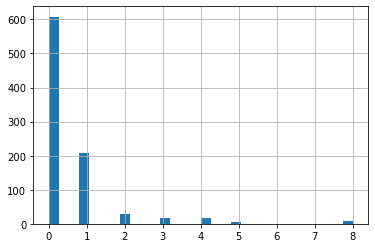

In [6]:
print("Плотность распределения 'SibSp':")
titanic['SibSp'].hist(bins = 30)

Плотность распределения 'Parch':


<AxesSubplot:>

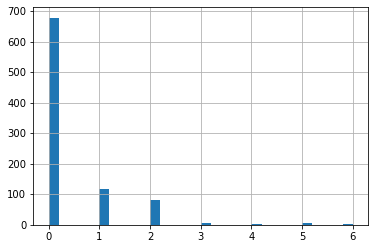

In [7]:
print("Плотность распределения 'Parch':")
titanic['Parch'].hist(bins = 30)

### 6. Какое самое популярное женское имя на корабле? Извлеките из полного имени пассажира (колонка Name) его личное имя (First Name). Попробуйте вручную разобрать несколько значений столбца Name и выработать правило для извлечения имен, а также разделения их на женские и мужские.

#### Правило извлечения личного имени:
1. Отделить фамилию и убрать её
2. Выделить и записать приставку Mr/Mrs/Miss
3. Выделить и записать личное имя

In [75]:
def get_first_name(name):
    first_name = name.split(',')[1].strip()
    if('(' in first_name):
        first_name = first_name.split('(')[1].strip()
        first_name = first_name.split(' ')[0].strip()
    else:
        first_name = first_name.split(' ')[1].strip()
    return first_name

first_name = titanic['Name'].apply(get_first_name)
titanic['First_Name'] = first_name
titanic[(titanic['Sex'] == 'female')]['First_Name'].value_counts()[:1]
#titanic[(titanic['Sex']=='female')].head(25)

Anna    14
Name: First_Name, dtype: int64

### 7. Коррелирует ли класс, которым ехал пассажир, с выживаемостью?

In [9]:
number_corr = titanic['Pclass'].corr(titanic['Survived'])
print("Корреляция Пирсона равна:",number_corr)
print("Так как значение корреляции не равно 0, значит связь осуществляется, но слабо.")

Корреляция Пирсона равна: -0.3384810359610149
Так как значение корреляции не равно 0, значит связь осуществляется, но слабо.


### 8. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров. Сделайте выводы. Отобразите данные на одном и нескольких графиках

Гистограмма возраста для не выживших и выживших:


array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

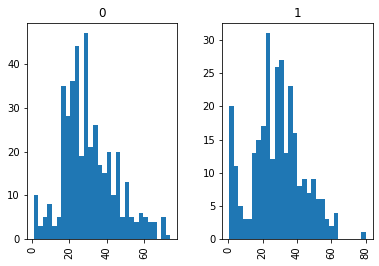

In [10]:
print("Гистограмма возраста для не выживших и выживших:")
titanic['Age'].hist((titanic['Survived']),bins = 30)

Общая гистограмма:


Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

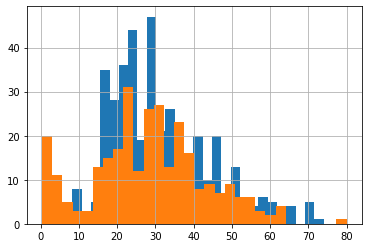

In [11]:
print("Общая гистограмма:")
titanic.groupby('Survived')['Age'].hist(bins = 30)

#### Вывод:
По гистограммам видно, что в первую очередь спасали детей.

### 9. Визуализируйте гистограммы возраста для выживших и не выживших пассажиров по классам. Сделайте выводы. 

Гистограммы:


Survived
False    [[AxesSubplot(0.1,0.6;0.347826x0.3), AxesSubpl...
True     [[AxesSubplot(0.1,0.6;0.347826x0.3), AxesSubpl...
Name: Age, dtype: object

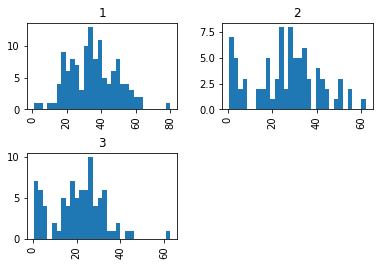

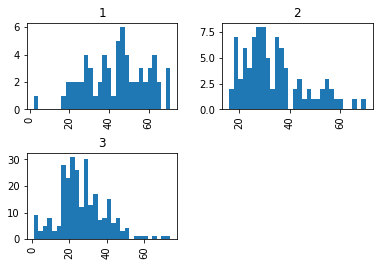

In [12]:
print("Гистограммы:")
titanic.groupby([(titanic['Survived']==0)])['Age'].hist(titanic['Pclass'],bins = 30)

### 10. Постройте столбчатую диаграмму количества людей: мужчины, женщины, дети.

<BarContainer object of 3 artists>

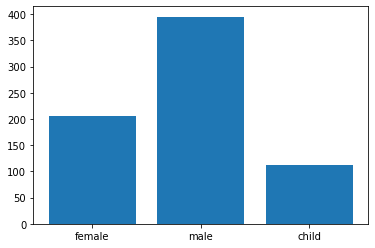

In [13]:
import matplotlib.pyplot as plt
number_female = titanic[(titanic['Sex']=='female') & (titanic['Age'] >= 18)]['PassengerId'].count()
number_male = titanic[(titanic['Sex']=='male') & (titanic['Age'] >= 18)]['PassengerId'].count()
number_child = titanic[(titanic['Age'] < 18)]['PassengerId'].count()
groups = ['female','male','child']
counts = [number_female,number_male,number_child]
plt.bar(groups,counts)

### Результат выполнения функций библиотеки Pandas: head, tail, info, describe, dropna, drop_duplicates, shape.

In [14]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
first_name = titanic['Name'].apply(get_first_name)
titanic['First_Name']=first_name
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.William


In [16]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S,Rev.Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S,Miss.Margaret
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S,Miss.Catherine
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C,Mr.Karl
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q,Mr.Patrick


In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  First_Name   891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [18]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
titanic.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.John
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.Jacques
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,Mr.Timothy
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,Miss.Marguerite
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,Miss.Elizabeth
...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,Mrs.Richard
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,Mr.Frans
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,Mrs.Thomas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.Margaret


In [20]:
titanic.drop_duplicates()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,First_Name
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.Owen
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.John
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.Laina
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.Jacques
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.William
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev.Juozas
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss.Margaret
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss.Catherine
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr.Karl


In [21]:
titanic.shape

(891, 13)